#                   **SATELLITE IMAGE CLASSIFICATION USING CNN**


DATASET - https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

CONTEXT : Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes [CLOUDY, DESERT, GREEN_AREA, WATER] mixed from Sensors and google map snapshot.



Importing the data from Kaggle directly through Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


kaggle.json file can be downloaded by accessing the settings page in respective kaggle account.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sharanyakumari","key":"9b70380abbb70241b9b93832f9ff95d2"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Mar 14 08:33 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle

In [6]:
cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          11591        383  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           1956         53  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21           9971        226  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49            918         29

In [10]:
!kaggle datasets download mahmoudreda55/satellite-image-classification

100% 21.8M/21.8M [00:01<00:00, 24.9MB/s]
100% 21.8M/21.8M [00:01<00:00, 14.1MB/s]


In [11]:
!unzip satellite-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/cloudy/train_23566.jpg  
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg  
  infl

Importing lirabries.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

Listing the 4 types of classes in the directory.

In [13]:
data_dir = '/content/data'
labels = os.listdir(data_dir)
labels

['green_area', 'cloudy', 'water', 'desert']

Number of images in each class.

In [14]:
for label in labels:
    print(label, len(os.listdir(data_dir+'/'+label)))

green_area 1500
cloudy 1500
water 1500
desert 1131


Displaying an example image from each class.

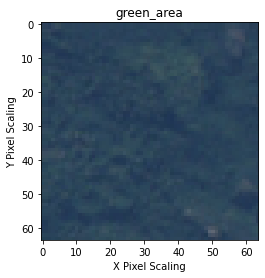

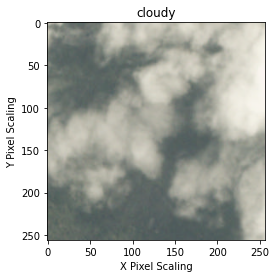

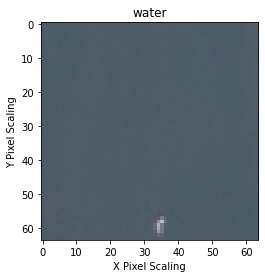

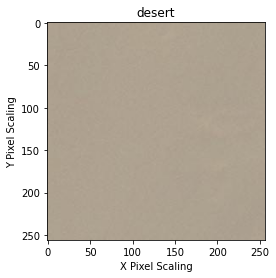

In [15]:
for label in labels:
  path = os.listdir(data_dir+'/'+label)
  img = data_dir+'/'+label+'/'+path[1]
  plt.title(label)
  plt.xlabel("X Pixel Scaling")
  plt.ylabel("Y Pixel Scaling")
  image = mpimg.imread(img)
  plt.imshow(image)
  plt.show()

Data Generator for creating training and testing sets with data augmentation. 
Images are also rescaled.
Data is split according to the 80/20 rule.

In [16]:
 datagen = ImageDataGenerator(samplewise_center=True,rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=False,rescale=1./255,validation_split=0.2)

 train_data = datagen.flow_from_directory(data_dir,target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=True,subset='training')

 test_data = datagen.flow_from_directory(data_dir,target_size=(64,64),batch_size=1,shuffle=False,subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


Visualising images created by the Generator.

Found 5631 images belonging to 4 classes.


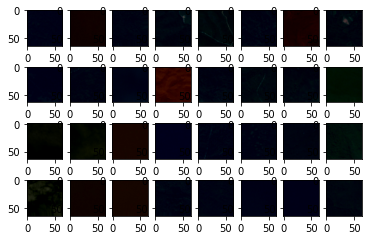

In [17]:
img_itr = datagen.flow_from_directory(data_dir,target_size=(64,64),batch_size=32)
x,y = img_itr.next()
fig, ax = plt.subplots(nrows=4,ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

Number of images in the train and test dataset.

In [18]:
lenoftrain = len(train_data)
print(lenoftrain)


lenoftest = len(test_data)
print(lenoftest)

141
1126


Importing libraries necessary for building the CNN model.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay

CNN Model 

In [20]:
model = Sequential()
model.add(Conv2D(75, (3,3), strides =1, padding="same", activation="relu", input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(50, (3,3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Conv2D(25, (3,3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

Viewing the model and the parameters.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 32, 32, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 50)       2

Creating the loss function and the metrics to be tracked.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Setting up an early callback and training the data for 20 epochs.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(train_data, validation_data=test_data,epochs=20,callbacks=[callback])

Epoch 1/20
141/141 [==============================] - 163s 1s/step - loss: 1.0520 - accuracy: 0.7740 - val_loss: 3.5475 - val_accuracy: 0.2025
Epoch 2/20
141/141 [==============================] - 155s 1s/step - loss: 0.4503 - accuracy: 0.8810 - val_loss: 2.6673 - val_accuracy: 0.3242
Epoch 3/20
141/141 [==============================] - 158s 1s/step - loss: 0.3693 - accuracy: 0.9054 - val_loss: 1.8652 - val_accuracy: 0.6501
Epoch 4/20
141/141 [==============================] - 161s 1s/step - loss: 0.3106 - accuracy: 0.9139 - val_loss: 1.0708 - val_accuracy: 0.6243
Epoch 5/20
141/141 [==============================] - 157s 1s/step - loss: 0.2507 - accuracy: 0.9330 - val_loss: 0.6133 - val_accuracy: 0.8011
Epoch 6/20
141/141 [==============================] - 161s 1s/step - loss: 0.2793 - accuracy: 0.9381 - val_loss: 0.1550 - val_accuracy: 0.9405
Epoch 7/20
141/141 [==============================] - 160s 1s/step - loss: 0.1897 - accuracy: 0.9447 - val_loss: 0.1146 - val_accuracy: 0.9583

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Creating plots to show accuracy and loss.

Text(0.5, 1.0, 'Training and Validation Loss')

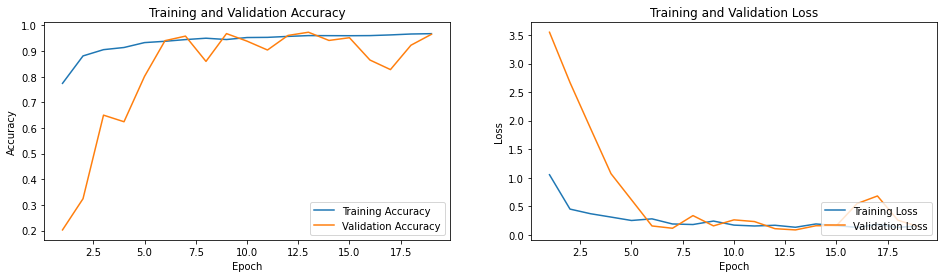

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Evaluating Test Data.

In [ ]:
score = model.evaluate(test_data)
print('Test Loss : ',score[0])
print('Test Accuracy : ',score[1])

1126/1126 [==============================] - 18s 16ms/step - loss: 0.1499 - accuracy: 0.9689
Test Loss :  0.14987294375896454
Test Accuracy :  0.9689165353775024


Predictions on Test Data. 

In [ ]:
predict = model.predict(test_data)
y_classes = predict.argmax(axis=-1)
y_classes

1126/1126 [==============================] - 15s 13ms/step


array([0, 0, 0, ..., 3, 3, 3])

Confusion Matrix for results.

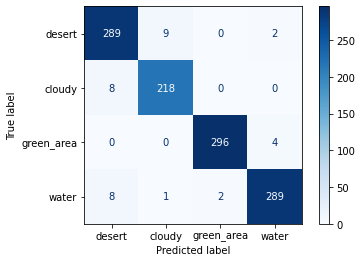

In [ ]:
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Classification Report.

In [ ]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       300
           1       0.96      0.96      0.96       226
           2       0.99      0.99      0.99       300
           3       0.98      0.96      0.97       300

    accuracy                           0.97      1126
   macro avg       0.97      0.97      0.97      1126
weighted avg       0.97      0.97      0.97      1126

